## Спроба пошуку кореляції між коеф. К1-К9 та виділеним бюджетним місцям в магістратуру в 2018 році 

## Частина ІІ

В першій частині ( https://www.facebook.com/serhiy.protsenko/posts/1807444902678971?hc_location=ufi ) була здійснена спроба аналізу яким чином МОН розподіляє бюджетні місця на магістратуру між закладами вищої освіти, було зроблено  парсінг офіційних файлів .pdf від МОН та зроблено аналіз та встановлено, що комісія МОН вибірково використовувала свій підхід (див. наказ  http://zakon3.rada.gov.ua/laws/show/z0625-18 ) для розподілу бюджету між університетами.

В другій частині ми проаналізуємо в якому випадку виділення бюджету відбувалося непропорційно добутку коефіцієнтів К1-К9 і саме для яких спеціальностей. Оскільки до першої частини надходили зауваження стосовно того, що не можна рахувати кореляцію по всій виборці (з чим я взагалі не згоден, оскільки немає принципової різниці). В другій частині ми будемо рахувати кореляції окремо для кожної спеціальності. Також були зауваження стосовно того, що необхідно шукати кореляцію між конкурсним балом (добуток між обсягом випуску бакалаврів та добутком коефіцієнтів К1-К9.) але, як ми встановили в першій частині є гарна кореляція між наданими бюджетними місцями в магістратуру та випуском бакалаврів але практично відсутня між добутком коефіцієнтів К1-К9 та відсотком виділеного бюджету магістрів. Оскільки здобутки університетів відображаються саме в коефіцієнтах К1-К9, а не в випуску бакалаврів то це питання нас буде цікавить більше всього.


В третій частині проаналізуємо питання, які університети отримали більший бюджет і за рахунок яких університетів це відбулося. (з'явиться незабаром, коли знайду вільний час)


Нагадаємо інформацію з першої частини:


Згідно наказу МОН №445 “Про затвердження Критеріїв конкурсного відбору виконавців державного замовлення на підготовку магістрів у закладах вищої освіти, які знаходяться у сфері управління МОН” див. http://zakon3.rada.gov.ua/laws/show/z0625-18
Запроваджується система згідно якої кожен ЗВО (заклад вищої освіти) повинен отримати ту кількість держбюджетних місць в магістратуру в 2018 році на яку він заслуговує згідно критеріїв, які підтверджують якість наукової роботи, диверсифікацію доходів, якість кадрового забезпечення тощо (див. детально наказ).

Кожен ЗВО повинен був надати необхідну інформацію для розрахунку критеріїв К1-К9 за кожного спеціальністю, надати обсяги випуску бакалаврів в 2018 році тощо.В результаті ЗВО, який мав гарні показники К1-К9 повинен був розраховувати на максимальні обсяги держбюджетних місць під всіх або практично під всіх випускників бакалавратури.

Ідея наказу взагалі гарна. Оцінити університети і окремі спеціальності в цих університетах за критеріями і пропорційно ним і обсягу випуску бакалаврів розподіляти держбюджетні місця і надавати держбюджетні місця тільки тим університетам, які на це заслуговують і можуть дійсно забезпечити якісну освіту.

Давайте спробуємо перевірити цей добрий намір. Забігаючи наперед, я побачив, що обсяг виділених держбюджетних місць в магістратуру в 2018 році дуже слабо або взагалі не корелює з коефіцієнтами К1-К9 та їх добутком і як в минулі роки розподіл держбюджетних місць скоріш за все відбувався в “ручному режимі” (дивлячись тільки на обсяги випуску бакалаврів), хоча необхідно зазначити, що за близько 30% спеціальностей виділення бюджету відбувалося пропорційно добутку коефіцієнтів К1-К9, чому присутня така вибірковість і чому підходи, які зазначені в наказі МОН не застосовувалися для всіх спеціальностей - залишається таємницею, можливо ми отримаємо відповіді на ці питання коли проаналізуємо в третій частині, які ЗВО отримали більший бюджет і за рахунок яких університетів це відбулося.


In [1]:
# Зробимо імпорт необхідних модулів
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#відключимо застереження
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_rows", 5000)

In [4]:
# Для аналізу будемо використовувати файл, якій ми отримали в першій частині
# (він, як і інші файли знаходяться за адресою https://github.com/SerhiyProtsenko/Magister_2018_K1-K9)
df=pd.read_excel('Mag2018_K1_k9_v2_not_sorted.xlsx')

### З чого складається наша таблиця? Ми маємо 3013 рядків та 23 стовчика. Якщо бажаєте можете переглянути таблицю в Excel https://github.com/SerhiyProtsenko/Magister_2018_K1-K9/blob/master/Mag2018_K1_k9_v2_not_sorted.xlsx . Таблиця має наступні важливі стовчики: Назва ЗВО; Назва спец.; значення всіх коефіцієнтів К1-К9 для кожної спеціальності та кожного ЗВО; добуток цих коефіцієнтів - Mult K1-K9; випуск бакалаврів; конкурсний бал (добуток випуску бакалаврів та добутку коефіцієнтів К1-К9; обсяг наданого бюджету на магістра ОПП/ОНП/всього; та останній і найважливіший стовпчик - % наданого державного замовлення від випуску бак., денна

In [5]:
#Подивимося (перші п'ять рядків), як виглядає файл 
df.head()

,рік,код ЗВО,Назва ЗВО,Код спец.,Код. спеціал,Назва спец.,K1,K2,K3,K4,...,K8,K9,Mult K1-K9,"Випуск бак., денна","Випуск бак. min 5, денна",Конкурсний бал,"Обсяг державного замовлення ОПП, денна","Обсяг державного замовлення ОНП, денна","Обсяг державного замовлення Всього, денна","% наданого державного замовлення від випуску бак., денна"
0,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,11,11111,"Освітні, педагогічні науки",1.07,1.07,1.0,1.02,...,1.00,1.00,1.695643,0,5,8.478213,9,0,9,180.000000
1,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,12,11111,Дошкільна освіта,1.07,1.07,1.0,1.02,...,1.01,1.00,1.556908,27,27,42.036524,19,0,19,70.370370
2,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,13,11111,Початкова освіта,1.07,1.07,1.0,1.02,...,1.00,1.00,1.400190,17,17,23.803227,12,0,12,70.588235
3,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,14,1,Середня освіта (українська мова і література),1.07,1.07,1.0,1.02,...,1.00,1.00,1.323115,30,30,39.693454,19,0,19,63.333333
4,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,14,2,Середня освіта (мова і література (із зазначен...,1.07,1.07,1.0,1.02,...,1.00,1.08,1.498332,52,52,77.913240,25,0,25,48.076923


In [6]:
#Подивимося на розмір нашої таблиці
df.shape

(3013, 23)

### Першу частину ми закінчили тим, що порахували кореляцію. Давайте нагадаємо. Що ми бачимо? Незначну кореляцію добутку коефіцієнтів К1-К9 з обсягом державного замовлення за ОС магістр. Вплив окремих коефіцієнтів взагалі мізерний, що свідчить скоріш за все про не досконалу методику.  Єдине, що необхідно відмітити дуже гарну кореляцію - 0.92 обсягу державного замовлення за ОС магістр з обсягом випуску бакалаврів, но якщо б і цього не було тоді я не знаю)))

In [7]:

temp_corr=df.copy()
temp_corr.drop(['рік', 'код ЗВО', 'Назва ЗВО', 'Код спец.', 'Код. спеціал',
                'Назва спец.', 'Випуск бак., денна','Обсяг державного замовлення ОПП, денна',
                'Обсяг державного замовлення ОНП, денна', 'Конкурсний бал'], axis=1, inplace=True)

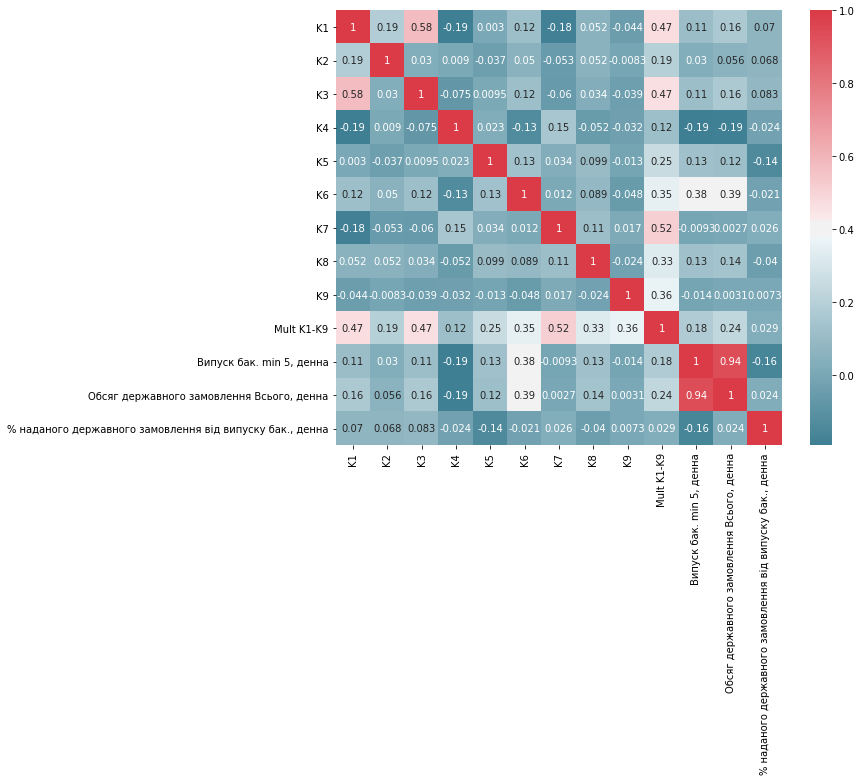

In [8]:
corr = temp_corr.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)
plt.show()

### Оскільки до першої частини надходили зауваження стосовно того, що не можна рахувати кореляцію по всій виборці (з чим я взагалі не згоден, оскільки немає принципової різниці). В другій частині ми будемо рахувати кореляції окремо для кожної спеціальності.  Давай це зробимо.

In [9]:
# Подивимося скільки у нас різних спеціальностей та спеціалізацій в нашій таблиці
spec=set(df['Назва спец.'])
len(spec)

173

In [10]:
special=set(df['Код. спеціал'])
len(special)

45

In [11]:
# Зробимо деякі підготовчи операції для формування таблиці кореляцій окремо для кожної спеціальності
columns1=['Код спец.', 'Назва спец.','Mult K1-K9', 'Випуск бак. min 5, денна',
       'Конкурсний бал', 'Обсяг державного замовлення Всього, денна',
       '% наданого державного замовлення від випуску бак., денна']

In [12]:
columns2=['Mult K1-K9', 'Випуск бак. min 5, денна',
       'Конкурсний бал', 'Обсяг державного замовлення Всього, денна',
       '% наданого державного замовлення від випуску бак., денна']

In [13]:
df_spec = pd.DataFrame(columns=['Код спец.', 'Назва спец.', 'Кількість пропозицій',
                       'Mult K1-K9', 'Випуск бак. min 5, денна', 
                       'Конкурсний бал', 'Обсяг державного замовлення Всього, денна',
                       '% наданого державного замовлення від випуску бак., денна'])

### Сформуємо таблицю, в якій для кожної спеціальності окремо порахуємо кореляцію зі стовпчиком "% наданого державного замовлення від випуску бак., денна". Нас в першу чергу буде цікавить значення стовпчика: ʼMult K1-K9, corrʼ (це добуток коефіцієнтів К1-К9 для яких ми знаходимо кореляцію окремо для кожної спеціальності з останнім стовпчиком). Крім того ви можете передивиться вю таблицю окремо в Excel, посилання - https://github.com/SerhiyProtsenko/Magister_2018_K1-K9/blob/master/Mag2018_Mult_K1-K9_corr.xlsx

In [14]:
for i,j in enumerate(spec):
    temp=df[df['Назва спец.']==j][columns1]
    df_spec.loc[i]=temp[columns2].corrwith(temp['% наданого державного замовлення від випуску бак., денна'])
    df_spec.loc[i,'Код спец.']=temp['Код спец.'].iat[0]
    df_spec.loc[i,'Назва спец.']=j
    df_spec.loc[i,'Кількість пропозицій']=temp['Назва спец.'].value_counts()[0]
    
    
    

In [15]:
#Наша таблиця нараховує 173 строки для всіх спеціальностей
df_spec.shape

(173, 8)

In [16]:
df_spec.columns=['Код спец.', 'Назва спец.', 'Кількість пропозицій', 'Mult K1-K9, corr',
       'Випуск бак. min 5, денна, corr', 'Конкурсний бал, corr',
       'Обсяг державного замовлення Всього, денна, corr',
       '% наданого державного замовлення від випуску бак., денна, corr']

In [17]:
#Давайте збережемо цю таблицю в форматі Exсel для 'ліриків', але залишимо тільки ті
# спеціальності, які мають більше 5 пропозицій
df_spec_10=df_spec[df_spec['Кількість пропозицій']>5].sort_values('Mult K1-K9, corr', axis=0, ascending=False, inplace=False)
df_spec_10.to_excel('Mag2018_Mult_K1-K9_corr.xlsx')
df_spec_10.head()

,Код спец.,Назва спец.,Кількість пропозицій,"Mult K1-K9, corr","Випуск бак. min 5, денна, corr","Конкурсний бал, corr","Обсяг державного замовлення Всього, денна, corr","% наданого державного замовлення від випуску бак., денна, corr"
100,184.0,Гірництво,9.0,0.987157,0.202340,0.228549,0.226208,1.0
88,186.0,Видавництво та поліграфія,7.0,0.938477,0.781361,0.820999,0.829958,1.0
2,275.0,Транспортні технології (на автомобільному,11.0,0.931557,0.684415,0.686373,0.698268,1.0
105,263.0,Цивільна безпека,9.0,0.920225,-0.504672,-0.218286,-0.268702,1.0
45,141.0,"Електроенергетика, електротехніка та\rелектром...",13.0,0.912609,0.102476,0.213623,0.267560,1.0


### Давайте візуалізуємо значення кореляції (порахованної для кожної спеціальності окремо) між добутком коефіцієнтів К1-К9 та відсотком наданого бюджету на магістра. Будемо відображати результати тільки для спеціальностей, які мають більш ніж 5 пропозицій від різних ЗВО

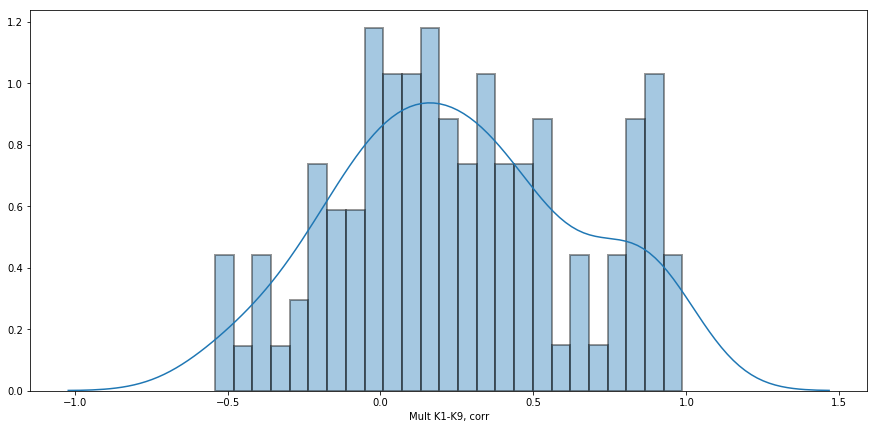

In [18]:
plt.figure(figsize=(15,7))
x=(df_spec[df_spec['Кількість пропозицій']>5]['Mult K1-K9, corr'])
ax = sns.distplot(x, hist_kws=dict(edgecolor="k", linewidth=2), bins=25)
plt.show()

#### Що ми бачимо? А бачимо наступне: невелика група піків - праворуч, які мають значення близько одиниці - гарну кореляцію (іншими словами для цієї групи піків виділення бюджету відбувалося грунтуючись на наказі та пропорційно добутку коефіцієнтів К1-К9). Основна маса піків лежить в діапазоні від -0.5 (взагалі нонсенс - маєш більший добуток коефіцієнтів К1-К9 отримаєш менший бюджет?!) до 0,5 з максимумом близько 0,2 що свідчить про геть погану кореляцію і як висновок - МОН в переважній кількості випадків не звертала увагу на добуток коефіцієнтів К1-К9, а виділяє бюджет ЗВО користуючись іншими підходами

### Добре всі ці кореляції мабуть вас втомили. Давайте просто побудуємо залежності окремо для кожної спеціальності (по всім ЗВО) де на вісі 'Х' відкладемо значення добутку коефіцієнтів К1-К9, а на вісі 'Y' відкладемо відсоток наданого державного замовлення на магістра від випуску бак., денна. Та побачимо на власні очі чи є якась залежність чи ні

### Спочатку розглянемо 'гарні спеціальності' для яких спостерігається значення кореляції більше 0.8 та для них дійсно комісія МОН користувалася наказом - виділяє бюджет пропорційно добутку коефіцієнтів К1-К9. Будемо брати спеціальності з кількістю пропозицій більш ніж 10 з метою збільшення статистичної достовірності

In [19]:
# Умова: більше 10 пропозицій та значення кореляції більше 0.8
sspec=list(df_spec[(df_spec['Кількість пропозицій']>10) & 
                   (df_spec['Mult K1-K9, corr']>0.8)].sort_values('Mult K1-K9, corr', axis=0, ascending=False, inplace=False)['Назва спец.'])

In [20]:
# Всього гарних спеціальностей виявилося - 11 позицій
sspec

['Транспортні технології (на автомобільному',
 'Електроенергетика, електротехніка та\rелектромеханіка',
 'Хімічні технології та інженерія',
 'Музичне мистецтво',
 'Біомедична інженерія',
 'Теплоенергетика',
 'Прикладна механіка',
 'Інформаційна, бібліотечна та архівна справа',
 'Дизайн',
 'Комп’ютерні науки',
 'Образотворче мистецтво, декоративне мистецтво,\rреставрація']

## Гарні спеціальності (бюджет виділявся практично пропорційно добутку коефіцієнтів К1-К9). Вісь 'Х' - значення добутку коефіцієнтів К1-К9, вісь 'Y' - відсоток наданого державного замовлення на магістра від випуску бак., денна.

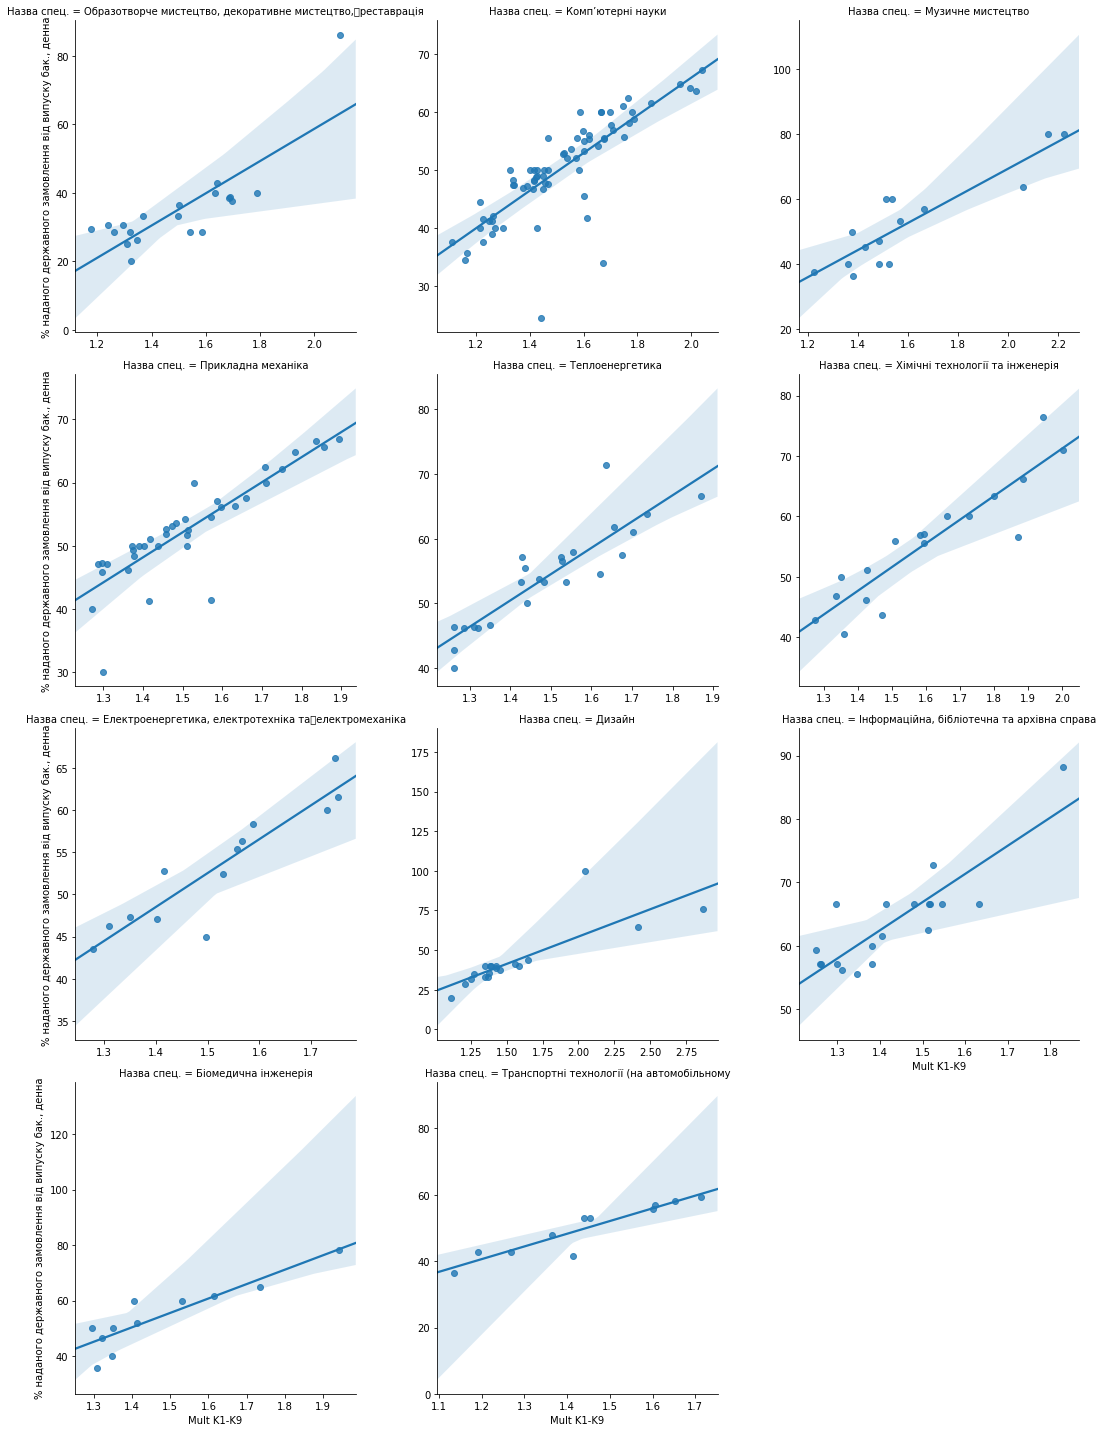

In [21]:
filtered_class =df[df['Назва спец.'].isin(sspec)]
gg=sns.lmplot("Mult K1-K9", "% наданого державного замовлення від випуску бак., денна", data=filtered_class,
           col='Назва спец.',sharex=False,sharey=False, col_wrap=3, ci=100)
plt.show()

### Що ми побачили? Доволі гарну кореляцію, хоча є поодинокі викиди. Але на жаль таких спеціальностей тільки 11.

## Середні спеціальності (викидів більше, кореляція гірша). Вісь 'Х' - значення добутку коефіцієнтів К1-К9, вісь 'Y' - відсоток наданого державного замовлення на магістра від випуску бак., денна.

### Для 'середніх спеціальностей' виберемо значення кореляції менше 0.8  та більше 0,5 тут вже не все однозначно і видно, що комісія МОН не завжди враховувала добуток коефіцієнтів К1-К9. Будемо брати спеціальності з кількістю пропозицій більш ніж 10 з метою збільшення статистичної достовірності

In [22]:
# Умова: більше 10 пропозицій та значення кореляції в діапазоні 0.5 - 0.8

sspec_mean=list(df_spec[(df_spec['Кількість пропозицій']>10) & (df_spec['Mult K1-K9, corr']>0.5) &
                        (df_spec['Mult K1-K9, corr']<0.8)].sort_values('Mult K1-K9, corr', axis=0, ascending=False, inplace=False)['Назва спец.'])

In [23]:
# Додатково добавимо шість спеціальностей, яких умовно також можна віднести до 'середніх спеціальностей'
sspec_mean.append('Журналістика')
sspec_mean.append('Метрологія та інформаційно-вимірювальна техніка')
sspec_mean.append('Облік і оподаткування')
sspec_mean.append('Економіка')
sspec_mean.append('Електроенергетика, електротехніка та')
sspec_mean.append('Телекомунікації та радіотехніка')

In [24]:
# Всього середніх спеціальностей - 18
len(sspec_mean)

18

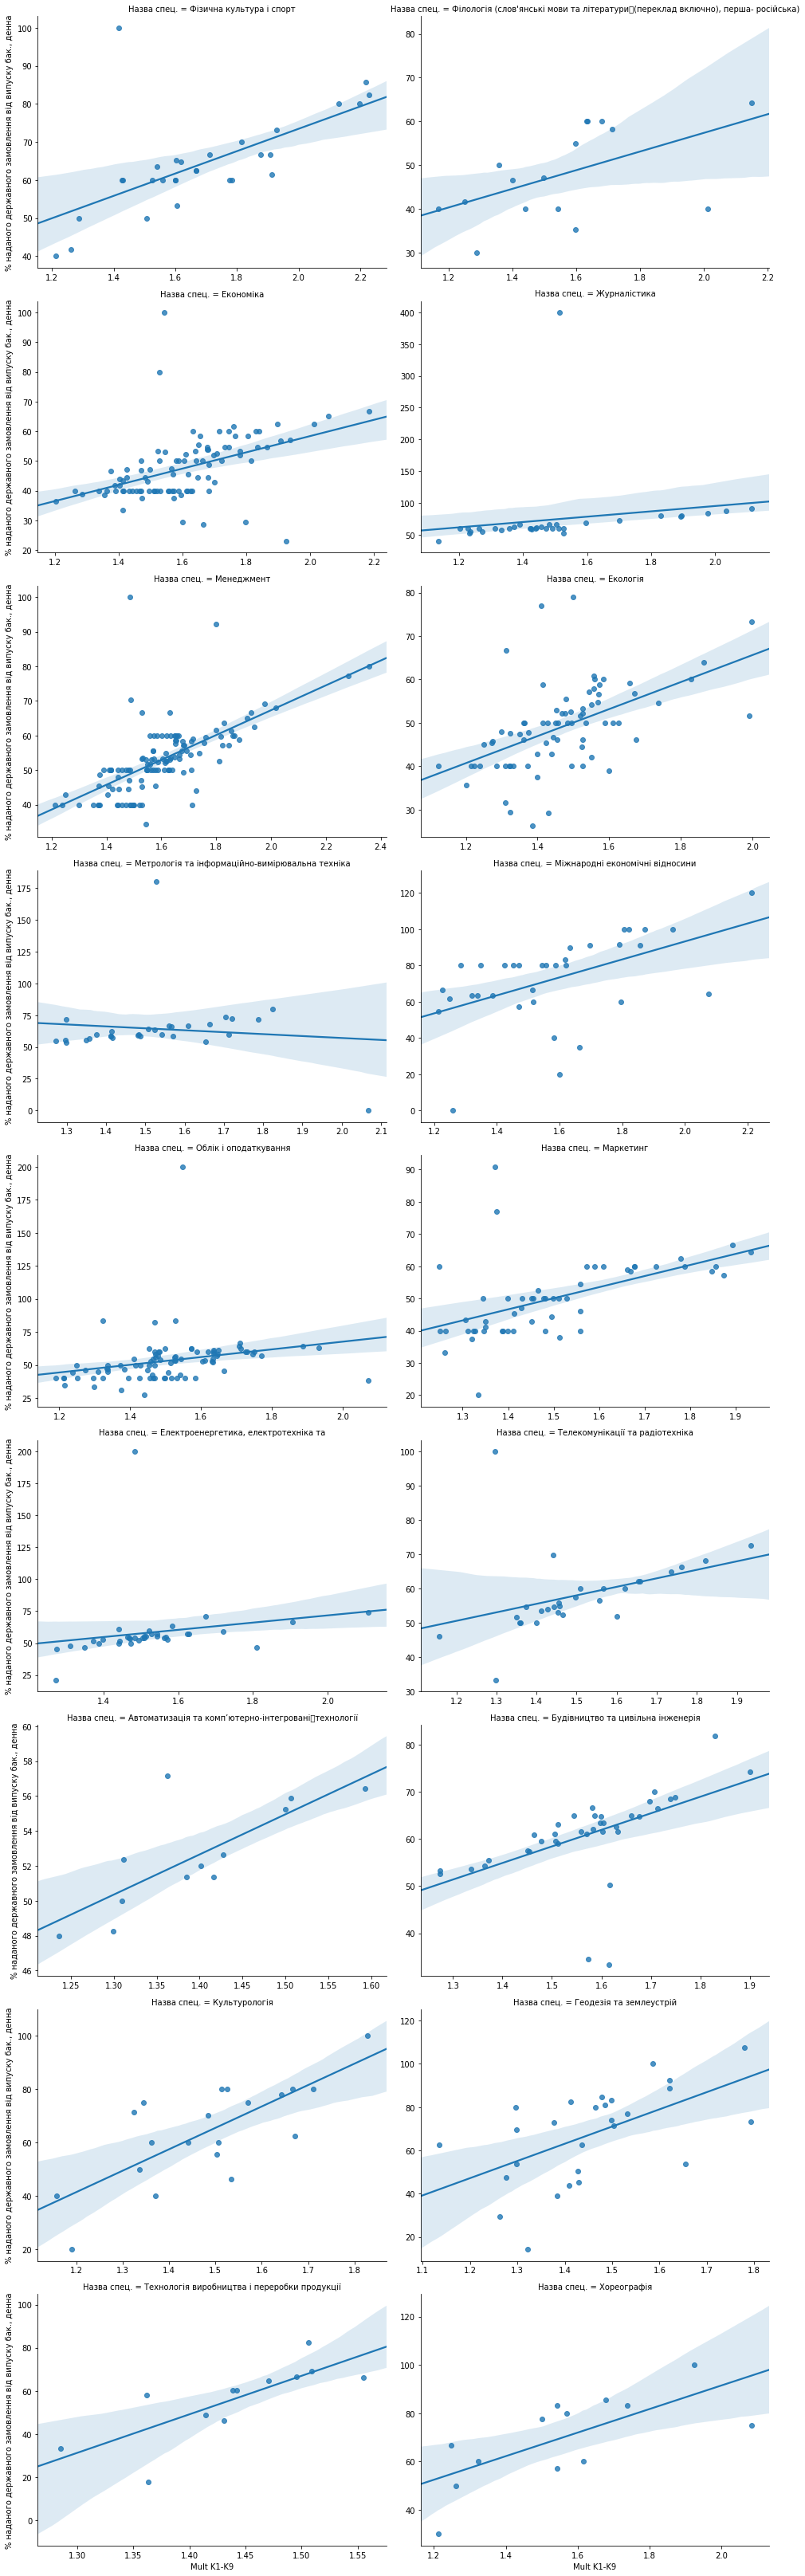

In [25]:
filtered_class =df[df['Назва спец.'].isin(sspec_mean)]

sns.lmplot("Mult K1-K9", "% наданого державного замовлення від випуску бак., денна", data=filtered_class,
           col='Назва спец.', aspect=1.4, sharex=False,sharey=False, col_wrap=2)
#g.set(ylim=(0, 210))
#g.set(xlim=(1, 2))

plt.show()

### Що ми побачили? В деяких випадках нормальну кореляцію, слабку залежність та велику кількість викидів. 

# Нарешті найцікавіша частина

## 63 'поганих спеціальностей', де взагалі незрозуміло яким чином виділявся бюджет

### Для 'поганих спеціальностей' виберемо значення кореляції менше  0,5 тут вже все взагалі погано і видно, що комісія МОН не  враховувала добуток коефіцієнтів К1-К9. Будемо брати спеціальності з кількістю пропозицій більш ніж 10 з метою збільшення статистичної достовірності

### Вісь 'Х' - значення добутку коефіцієнтів К1-К9, вісь 'Y' - відсоток наданого державного замовлення на магістра від випуску бак., денна.

In [26]:
sspec_low=list(df_spec[(df_spec['Кількість пропозицій']>10) & 
                       (df_spec['Mult K1-K9, corr']<0.5)].sort_values('Mult K1-K9, corr', axis=0, ascending=False, inplace=False)['Назва спец.'])

In [27]:
# Приберемо шість спеціальностей, які ми перенесли до групи 'середніх спеціальностей'
sspec_low.remove('Журналістика')
sspec_low.remove('Метрологія та інформаційно-вимірювальна техніка')
sspec_low.remove('Облік і оподаткування')
sspec_low.remove('Економіка')
sspec_low.remove('Електроенергетика, електротехніка та')
sspec_low.remove('Телекомунікації та радіотехніка')

In [28]:
# Всього поганих спеціальностей - 63

len(sspec_low)

63

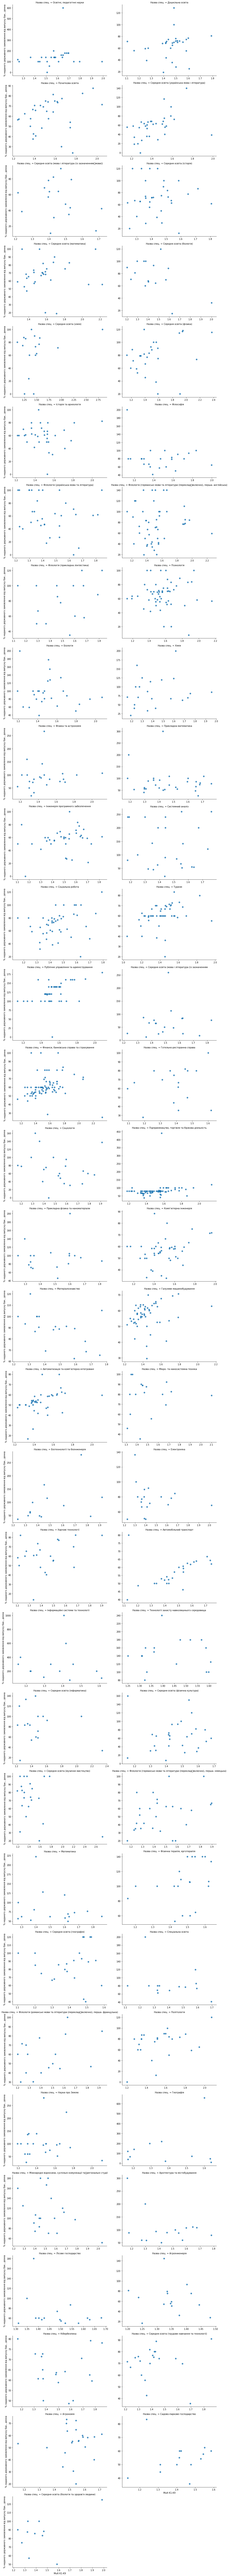

In [29]:
filtered_class =df[df['Назва спец.'].isin(sspec_low)]

sns.lmplot("Mult K1-K9", "% наданого державного замовлення від випуску бак., денна", data=filtered_class,
           col='Назва спец.', aspect=1.4, fit_reg=False, sharex=False,sharey=False, col_wrap=2)
#g.set(ylim=(0, 210))
#g.set(xlim=(1, 2))

plt.show()

### Що ми побачили? Взагалі відсутність зв'язку з коефіцієнтами К1-К9. Для цих спеціальностей Наказ МОН не використовувався. Чому так сталося? Чому такий вибірковий підхід

### В результаті нашого аналізу ми розділили спеціальності на три групи:
- гарні спеціальності - 11 позицій;
- середні спеціальності - 18 позицій;
- та погані спеціальності - 63 позиції.

Для поганих спеціальностей видно дуже наочно, що комісія МОН не враховувала коефіцієнти К1-К9 взагалі

## Наступним етапом нашого аналізу буде спроба з'ясувати чому так сталося

### Спочатку ми порахуємо узагальнюючі показники за всіма спеціальностями: загальний бюджет, загальний випуск тощо.

In [30]:
df_spec2 = pd.DataFrame(columns=['Код спец.', 'Назва спец.', 'Кількість пропозицій', 
       'Mult K1-K9', 'Випуск бак., денна', 'Випуск бак. min 5, денна',
       'Обсяг державного замовлення ОПП, денна',
       'Обсяг державного замовлення ОНП, денна',
       'Обсяг державного замовлення Всього, денна',
       '% наданого державного замовлення від випуску бак., денна'])

In [31]:
colAll=['Код спец.', 'Назва спец.', 
       'Mult K1-K9', 'Випуск бак., денна', 'Випуск бак. min 5, денна',
       'Обсяг державного замовлення ОПП, денна',
       'Обсяг державного замовлення ОНП, денна',
       'Обсяг державного замовлення Всього, денна',
       '% наданого державного замовлення від випуску бак., денна']

In [32]:
col1=['Mult K1-K9']

In [33]:
col2=['Випуск бак., денна', 'Випуск бак. min 5, денна','Обсяг державного замовлення ОПП, денна',
       'Обсяг державного замовлення ОНП, денна',
       'Обсяг державного замовлення Всього, денна']

In [34]:
col3=['% наданого державного замовлення від випуску бак., денна']

In [35]:
for i,j in enumerate(spec):
    temp=df[df['Назва спец.']==j][colAll]
    df_spec2.loc[i,col1]=temp[col1].mean()
    df_spec2.loc[i,col2]=temp[col2].sum()
    df_spec2.loc[i,col3]=((temp['Обсяг державного замовлення Всього, денна'].sum()/
                                                                temp['Випуск бак. min 5, денна'].sum())*100)
    
    df_spec2.loc[i,'Код спец.']=temp['Код спец.'].iat[0]
    df_spec2.loc[i,'Назва спец.']=j
    df_spec2.loc[i,'Кількість пропозицій']=temp['Назва спец.'].value_counts()[0]

In [36]:
df_spec2.columns=['Код спец.', 'Назва спец.', 'Кількість пропозицій', 'Mult K1-K9, mean',
       'Випуск бак., денна, sum', 'Випуск бак. min 5, денна, sum', 
       'Обсяг державного замовлення ОПП, денна, sum',
       'Обсяг державного замовлення ОНП, денна, sum',
       'Обсяг державного замовлення Всього, денна, sum',
       '% наданого державного замовлення від випуску бак., денна']

### В цій таблиці ви можете побачити та проаналізувати за кожною спеціальністю окремо середні значення добутку коефіцієнтів К1-К9, сумарні значення випуску та виділеного бюджету та загальний відсоток для кожної спеціальності наданого бюджету на магістра від випуску бакалаврів. Ви також можете переглянути цей файл за посиланням - https://github.com/SerhiyProtsenko/Magister_2018_K1-K9/blob/master/Mag2018_spec_all_budj.xlsx

In [37]:
df_spec2[df_spec2['Кількість пропозицій']>10].sort_values('% наданого державного замовлення від випуску бак., денна', axis=0, ascending=False, inplace=False).head()

,Код спец.,Назва спец.,Кількість пропозицій,"Mult K1-K9, mean","Випуск бак., денна, sum","Випуск бак. min 5, денна, sum","Обсяг державного замовлення ОПП, денна, sum","Обсяг державного замовлення ОНП, денна, sum","Обсяг державного замовлення Всього, денна, sum","% наданого державного замовлення від випуску бак., денна"
145,126,Інформаційні системи та технології,13,1.36109,21,76,198,10,208,273.684
0,11,"Освітні, педагогічні науки",28,1.57436,1,140,197,7,204,145.714
152,183,Технології захисту навколишнього середовища,17,1.43328,22,91,131,0,131,143.956
41,281,Публічне управління та адміністрування,46,1.54112,72,266,332,0,332,124.812
3,227,"Фізична терапія, ерготерапія",21,1.47952,208,236,216,0,216,91.5254


In [38]:
#Давайте збережемо цю таблицю в форматі Exсel для 'ліриків'
df_budj=df_spec2.sort_values('% наданого державного замовлення від випуску бак., денна', axis=0, ascending=False, inplace=False)
df_budj.to_excel('Mag2018_spec_all_budj.xlsx')

### Давайте візуалізуємо значення відсотку наданого державного замовлення на магістра від випуску бакалаврів. Будемо відображати результати тільки для спеціальностей, які мають більш ніж 10 пропозицій від різних ЗВО

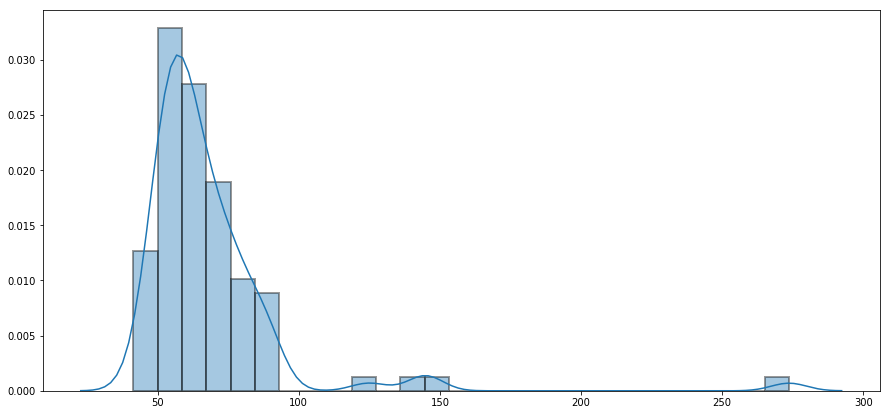

In [39]:
plt.figure(figsize=(15,7))
x=(df_spec2[df_spec2['Кількість пропозицій']>10]['% наданого державного замовлення від випуску бак., денна'])
ax = sns.distplot(list(x), hist_kws=dict(edgecolor="k", linewidth=2))
plt.show()

### Що ми бачимо? Пік приходится на 66% наданого державного замовлення на магістра від випуску бакалаврів, хоча видно, що для різних спеціальностей приймалися окремі рішення

# Далі буде.....

### В третій частині проаналізуємо питання, які університети отримали більший бюджет і за рахунок яких університетів це відбулося. (з'явиться незабаром, коли знайду вільний час)